# **Amazon AWS SaaS Sales** 

**Created by `Nabila Setya Utami`**
___

## **BACKGROUND**

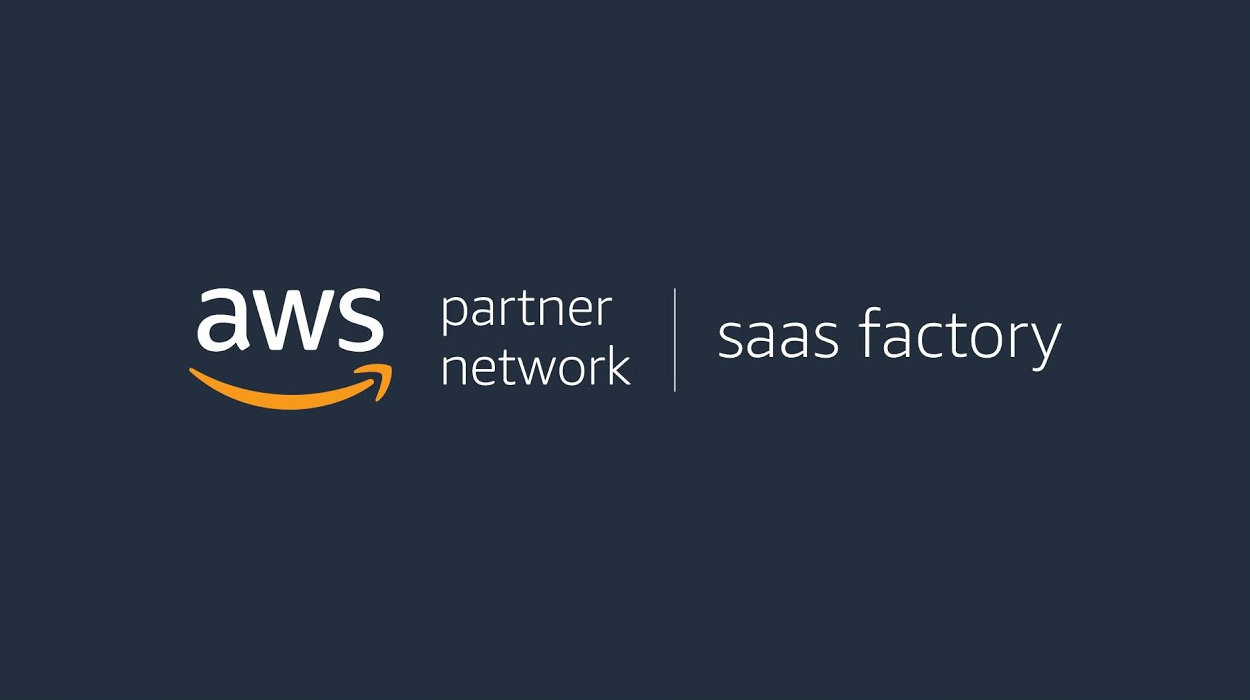

Amazon Web Services (AWS), founded in 2006, is a leading cloud platform offering over 200 services, ranging from computing and storage to databases, enabling businesses to grow and adapt efficiently. Trusted by millions of companies worldwide, AWS is known for its reliability, high security, and cost-effectiveness. AWS provides three main models: Infrastructure as a Service (IaaS), Platform as a Service (PaaS), and Software as a Service (SaaS), offering flexibility and scalability to meet a wide range of IT needs optimally.

Here’s a quick overview of each model on AWS:
- **IaaS**: AWS provides basic infrastructure like servers and storage. Users manage the OS and applications.
  - **Examples**: Amazon EC2, Amazon S3.
- **PaaS**: AWS offers a platform to develop and run applications without managing infrastructure. Users focus on coding.
  - **Examples**: AWS Elastic Beanstalk, AWS Lambda.
- **SaaS**: AWS delivers ready-to-use applications accessible online. Users simply use the apps, with no management needed.
  - **Examples**: Amazon Chime, Amazon QuickSight.

Each model offers flexibility based on management and development needs.



____
## **PROBLEM**

A. Evaluate Sales Performance:
1. What is the monthly and yearly profit trend?
2. What impact do discounts have on profit margins?
3. What is the profitability and sales performance of each product?

B. Evaluate Customer Segmentation:
1. Which industries or customer segments yield the highest profits or greatest losses?

C. Evaluate Market Distribution:
1. Distribution of products across regions, sub-regions, or cities.
2. Which region shows the highest and lowest performance?


____
## **GOALS**

The main goal is to help AWS (Amazon Web Services), particularly with their SaaS products, gain insights to improve business performance. This is essential if profits are influenced by sales trends, customer types, or market reach. By analyzing these areas, AWS can make informed decisions to boost sales, enhance customer service, and expand into additional markets, ultimately driving higher profits and business growth.


____
## **DATA PREPARATION**
### **Dataset**



In [2]:
# Load Library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from operator import attrgetter
from scipy import stats
from datetime import datetime
from operator import attrgetter
import plotly.express as px
from scipy.stats import spearmanr

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the Dataset

data = pd.read_csv('SaaS-Sales.csv')
data.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


- Column Description

    Here is the Initial Dataset:

    | COLUMN         | DESCRIPTION                                           |
    |----------------|-------------------------------------------------------|
    | **Row ID**     | A unique identifier for each transaction.             |
    | **Order ID**   | A unique identifier for each order.                   |
    | **Order Date** | The date when the order was placed.                   |
    | **Date Key**   | A numerical representation of the order date (YYYYMMDD). |
    | **Contact Name** | The name of the person who placed the order.       |
    | **Country**    | The country where the order was placed.               |
    | **City**       | The city where the order was placed.                  |
    | **Region**     | The region where the order was placed.                |
    | **Subregion**  | The subregion where the order was placed.             |
    | **Customer**   | The name of the company that placed the order.        |
    | **Customer ID** | A unique identifier for each customer.              |
    | **Industry**   | The industry the customer belongs to.                 |
    | **Segment**    | The customer segment (e.g., SMB, Strategic, Enterprise). |
    | **Product**    | The product that was ordered.                         |
    | **License**    | The license key for the product.                      |
    | **Sales**      | The total sales amount for the transaction.           |
    | **Quantity**   | The total number of items in the transaction.         |
    | **Discount**   | The discount applied to the transaction.              |
    | **Profit**     | The profit from the transaction.                      |

___
## **DATA CLEANING**


### **Data Checking**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [5]:
data.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# Check for Missing Values

data.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# Check for Duplicates

data.duplicated().sum()

np.int64(0)

In [8]:
# Verify Data Types

data.dtypes

Row ID            int64
Order ID         object
Order Date       object
Date Key          int64
Contact Name     object
Country          object
City             object
Region           object
Subregion        object
Customer         object
Customer ID       int64
Industry         object
Segment          object
Product          object
License          object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### **Convert String Into Datetime**

In [9]:
# Change All Order Date Format

data['Order Date'] = pd.to_datetime(data['Order Date'])

In [10]:
# Drop Row ID & Date Key 

df_sales = data.drop(columns= ['Row ID', 'Date Key'])
df_sales.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [11]:
# Find unique values in each column

df_sales.nunique()

Order ID        5009
Order Date      1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Customer ID       99
Industry          10
Segment            3
Product           14
License         9994
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
df_sales['Country'].unique()

array(['Ireland', 'United States', 'Germany', 'Sweden', 'Canada', 'Japan',
       'Italy', 'Turkey', 'Costa Rica', 'France', 'Australia',
       'Luxembourg', 'Brazil', 'Philippines', 'India', 'United Kingdom',
       'Chile', 'Spain', 'South Africa', 'Portugal', 'Colombia',
       'Belgium', 'Russia', 'Netherlands', 'Mexico', 'Poland',
       'Singapore', 'New Zealand', 'Czech Republic', 'Saudi Arabia',
       'Argentina', 'South Korea', 'Finland', 'Israel', 'Norway',
       'Ukraine', 'United Arab Emirates', 'Greece', 'China', 'Austria',
       'Indonesia', 'Egypt', 'Denmark', 'Croatia', 'Taiwan', 'Qatar',
       'Slovenia', 'Iceland'], dtype=object)

In [13]:
df_sales['Region'].unique()

array(['EMEA', 'AMER', 'APJ'], dtype=object)

In [14]:
df_sales['Subregion'].unique()

array(['UKIR', 'NAMER', 'EU-WEST', 'NOR', 'JAPN', 'EU', 'MEA', 'LATAM',
       'ANZ', 'APAC', 'IND', 'EU-EAST'], dtype=object)

In [15]:
df_sales['Industry'].unique()

array(['Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing',
       'Retail', 'Consumer Products', 'Misc', 'Transportation',
       'Communications'], dtype=object)

In [16]:
df_sales['Segment'].unique()

array(['SMB', 'Strategic', 'Enterprise'], dtype=object)

In [17]:
df_sales['Product'].unique()

array(['Marketing Suite', 'FinanceHub', 'ContactMatcher',
       'Marketing Suite - Gold', 'SaaS Connector Pack', 'ChatBot Plugin',
       'Site Analytics', 'OneView', 'Support', 'Data Smasher',
       'SaaS Connector Pack - Gold', 'Storage', 'Big Ol Database',
       'Alchemy'], dtype=object)

In [18]:
df_sales['Customer'].unique()

array(['Chevron', 'Phillips 66', 'Royal Dutch Shell', 'BNP Paribas',
       'Engie', 'Microsoft', 'Pfizer', 'Toyota Motor', 'Home Depot',
       'Wells Fargo', 'Carrefour', 'Costco Wholesale', 'McKesson',
       'Siemens', 'Intel', 'Glencore', 'Procter & Gamble',
       'Banco Santander', 'Pemex', 'Samsung Electronics', 'Sony',
       'Morgan Stanley', 'Bank of America Corp.', 'Tesco', 'Aviva',
       'Mondelez International', 'Abbott Laboratories', 'Fannie Mae',
       'Aetna', 'Oracle', 'Nissan Motor', 'Tyson Foods',
       'Verizon Communications', 'Itochu', 'Daimler', 'Walgreens',
       'Boeing', 'Valero Energy', 'Nestle', 'Philip Morris International',
       'Trafigura Group', 'Walmart', 'Cisco Systems',
       'Prudential Financial', 'Amazon', 'Gazprom', 'FedEx',
       'Honda Motor', 'CVS Health', 'General Motors',
       'State Farm Insurance Cos.', 'Comcast', 'AmerisourceBergen',
       'Johnson & Johnson', 'HonHai Precision Industry',
       'American Express', 'J.P. Morgan

In [19]:
# Difference between customer ID and the name
df_sales['Customer'].nunique() - df_sales['Customer ID'].nunique()

0

In [20]:
df_sales[['Customer ID', 'Customer']].drop_duplicates().reset_index(drop= True)

,Customer ID,Customer
0,1017,Chevron
1,1056,Phillips 66
2,1031,Royal Dutch Shell
3,1065,BNP Paribas
4,1062,Engie
...,...,...
94,1071,News Corp.
95,1016,Caterpillar
96,1020,Citigroup
97,1091,Panasonic


This means that there are no difference in customers and each of them had a unique ID.

After conducting data checks:

- **No missing values**: All columns are complete, so no filling is needed.
- **No duplicates**: There are no duplicate rows in the dataset.
- **Date Key duplication**: The `Date Key` column holds the same information as `Order Date`, so it can be removed.
- **Row ID redundancy**: `Row ID` is unnecessary, as it’s already represented by the DataFrame index and can be removed.


### **Outlier Checking**

The purpose of outlier checking is to identify unusually high or low values that may skew analysis, indicate data entry errors, or reveal important trends and patterns.

In [21]:
data_desc = df_sales[['Sales', 'Quantity', 'Discount', 'Profit']].describe()
data_desc

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


From the description, there are no weird values in the sales, quantity and discount as there were no negative numbers. Except for profit as it can be gains or losses.

In [22]:
# List of columns to check for outliers
out_check= ['Discount', 'Profit', 'Quantity', 'Sales']

# Define function to calculate outlier percentage
def calculate_outliers(df_sales, column):
    q1, q3 = df_sales[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers = df_sales[(df_sales[column] < lower_bound) | (df_sales[column] > upper_bound)]
    return len(outliers), (len(outliers) / len(df_sales)) * 100

# Result
outlier_results = {col: calculate_outliers(df_sales, col) for col in out_check}
outlier_df = pd.DataFrame(outlier_results, index=["Outlier Count", "Outlier Percentage"]).T
outlier_df


,Outlier Count,Outlier Percentage
Discount,856.0,8.565139
Profit,1881.0,18.821293
Quantity,170.0,1.701021
Sales,1167.0,11.677006


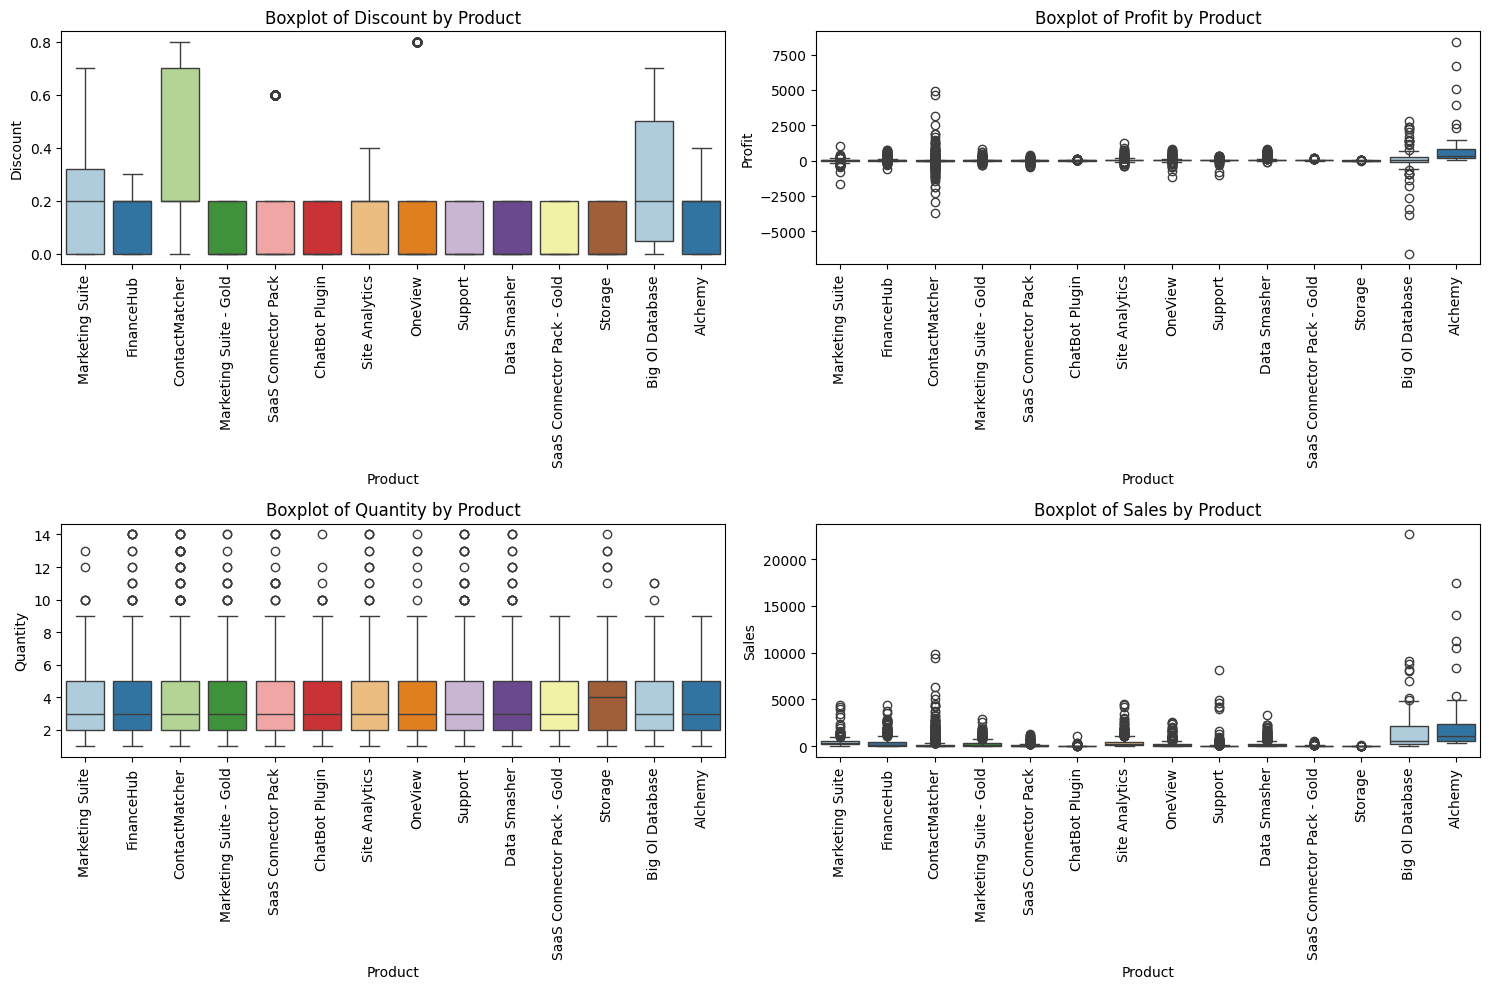

In [23]:
# Set up the plotting area
plt.figure(figsize=(15, 10))

# Plot boxplots for each outlier column grouped by "Product"
for i, col in enumerate(['Discount', 'Profit', 'Quantity', 'Sales'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_sales, x='Product', y=col, palette='Paired')
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of {col} by Product')

plt.tight_layout()
plt.show()

There are a lot of outliers in Sales and Profit, with each of the types included 11% and 18% of the data, however it is decided to be left there as there might be special cases or rare cases that we need to investigate later, so that we could fix the losses or justify the jump in profit.

The contact matcher and Big Ol Database has a big outliers in the profit boxplot.
Alchemy Product had a big positive outliers that can mean a good performance in the profit taking.

### **Saving The Cleaned Data to CSV File**

In [24]:
df_sales.to_csv('SaaS_Sales_CleanVersion.csv')

### **Data Distributions Checking**

The purpose of a normality test is to assess whether the sales distribution of each product follows a normal (or Gaussian) distribution. Understanding this helps in identifying any unusual patterns or outliers in the data. By doing so, the product development team can make more informed decisions regarding planning, stock management, and resource allocation, ensuring that our products align more effectively with customer needs and succeed in the market.

In [25]:
from scipy.stats import normaltest

# Function to perform D'Agostino's K-squared test for normality
def dagostino_normality_test(df_sales, columns):
    results = []
    for column in columns:
        stat, p_value = normaltest(df_sales[column])
        results.append({
            "Column": column,
            "Test Statistic": stat,
            "p-value": p_value,
            "Normal Distribution": "Yes" if p_value > 0.05 else "No"
        })
    return pd.DataFrame(results)

# Columns to test for normality
columns_to_test = ['Discount', 'Profit', 'Quantity', 'Sales']

# Perform D'Agostino's K-squared test
dagostino_results = dagostino_normality_test(df_sales, columns_to_test)
dagostino_results




,Column,Test Statistic,p-value,Normal Distribution
0,Discount,2977.822121,0.0,No
1,Profit,14363.736244,0.0,No
2,Quantity,2148.018022,0.0,No
3,Sales,18033.308498,0.0,No


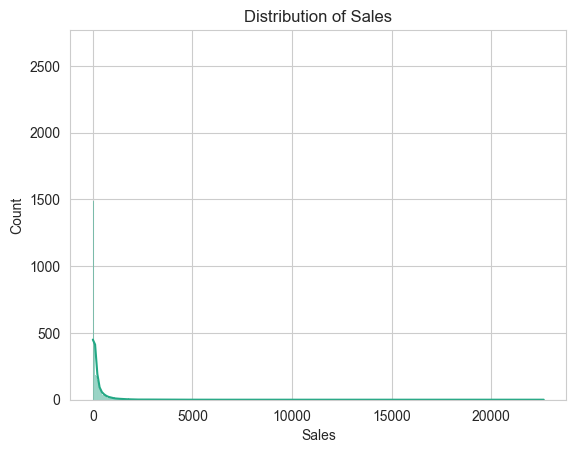

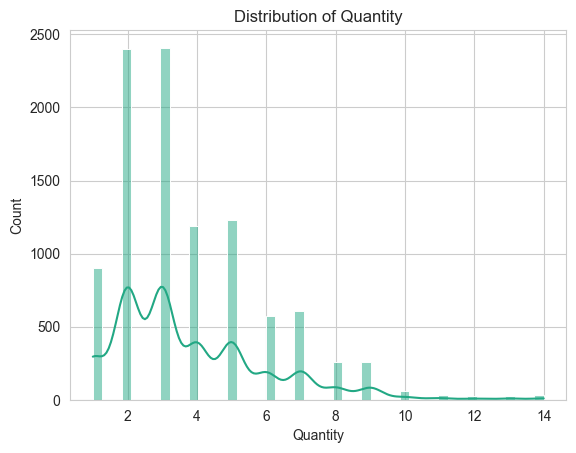

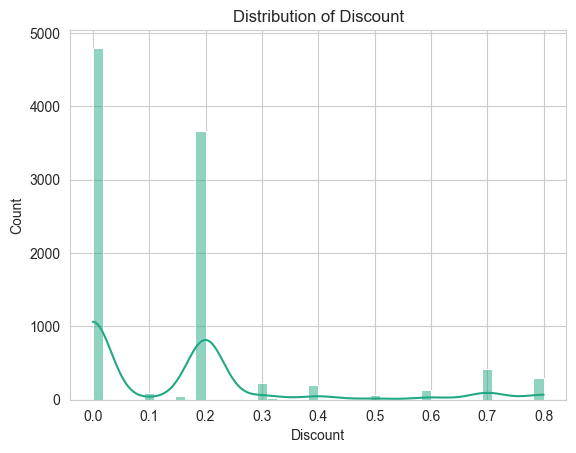

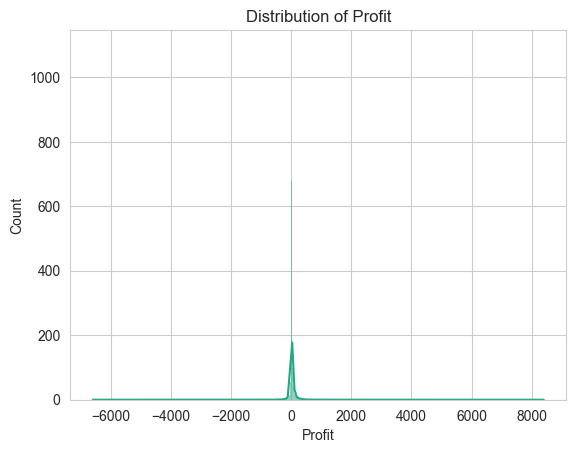

{'Sales': {'statistic': np.float64(18033.30849753588),
  'pvalue': np.float64(0.0),
  'normality_conclusion': 'pvalue = 0.00000, we reject Ho and conclude that Sales data is not normal'},
 'Quantity': {'statistic': np.float64(2148.0180216001404),
  'pvalue': np.float64(0.0),
  'normality_conclusion': 'pvalue = 0.00000, we reject Ho and conclude that Quantity data is not normal'},
 'Discount': {'statistic': np.float64(2977.8221207355864),
  'pvalue': np.float64(0.0),
  'normality_conclusion': 'pvalue = 0.00000, we reject Ho and conclude that Discount data is not normal'},
 'Profit': {'statistic': np.float64(14363.736243749532),
  'pvalue': np.float64(0.0),
  'normality_conclusion': 'pvalue = 0.00000, we reject Ho and conclude that Profit data is not normal'}}

In [275]:
from scipy.stats import normaltest

results = {}
palette = sns.color_palette("viridis", as_cmap=True)

# Normality test and plotting
for col in columns_to_test:
    # Plot the distribution with KDE
    sns.set_style('whitegrid')
    sns.histplot(df_sales, x=col, kde=True, color=palette(0.6))
    plt.title(f'Distribution of {col}')
    plt.show()

    # Normality test
    statistic, pvalue = normaltest(df_sales[col])
    results[col] = {
        'statistic': statistic,
        'pvalue': pvalue,
        'normality_conclusion': (
            f"pvalue = {pvalue:.5f}, we do not reject Ho and conclude that {col} data is normal"
            if pvalue > 0.05 else
            f"pvalue = {pvalue:.5f}, we reject Ho and conclude that {col} data is not normal"
        )
    }

results


The normality tests for each column yielded the following outcomes:

- **Sales**: p-value = 0.00000, We reject the null hypothesis (Ho) and conclude that the Sales data does not follow a normal distribution.
  
- **Quantity**: p-value = 0.00000, We reject the null hypothesis and conclude that the Quantity data does not follow a normal distribution.
  
- **Discount**: p-value = 0.00000, We reject the null hypothesis and conclude that the Discount data does not follow a normal distribution.
  
- **Profit**: p-value = 0.00000, We reject the null hypothesis and conclude that the Profit data does not follow a normal distribution.

All tested variables show a significant deviation from normality, indicating non-normal distributions. This insight is essential for choosing appropriate statistical methods, as it suggests that non-parametric techniques or data transformations may be more suitable for further analyses.


___
# **DATA ANALYSIS**

## **Analyze Sales Performance**
### **1. Analysis of Monthly and Yearly Sales Trends**

In [276]:
df_sales['Order Date']

0      2022-11-09
1      2022-11-09
2      2022-06-13
3      2021-10-11
4      2021-10-11
          ...    
9989   2020-01-22
9990   2023-02-27
9991   2023-02-27
9992   2023-02-27
9993   2023-05-05
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [277]:
df_sales['Year'] = df_sales['Order Date'].dt.strftime('%Y').astype(str)
df_sales['YearMonth'] = df_sales['Order Date'].dt.to_period('M')
df_sales['YearMonth'] = df_sales['YearMonth'].astype(str)
df_sales.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year,YearMonth
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022,2022-11
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022,2022-11
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022,2022-06
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021,2021-10
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021,2021-10


In [278]:
sales_monthly = df_sales.groupby(by= 'YearMonth')[['Sales']].sum()
sales_monthly.head()

,Sales
YearMonth,
2020-01,13946.229
2020-02,4810.558
2020-03,55691.009
2020-04,28295.345
2020-05,23648.287


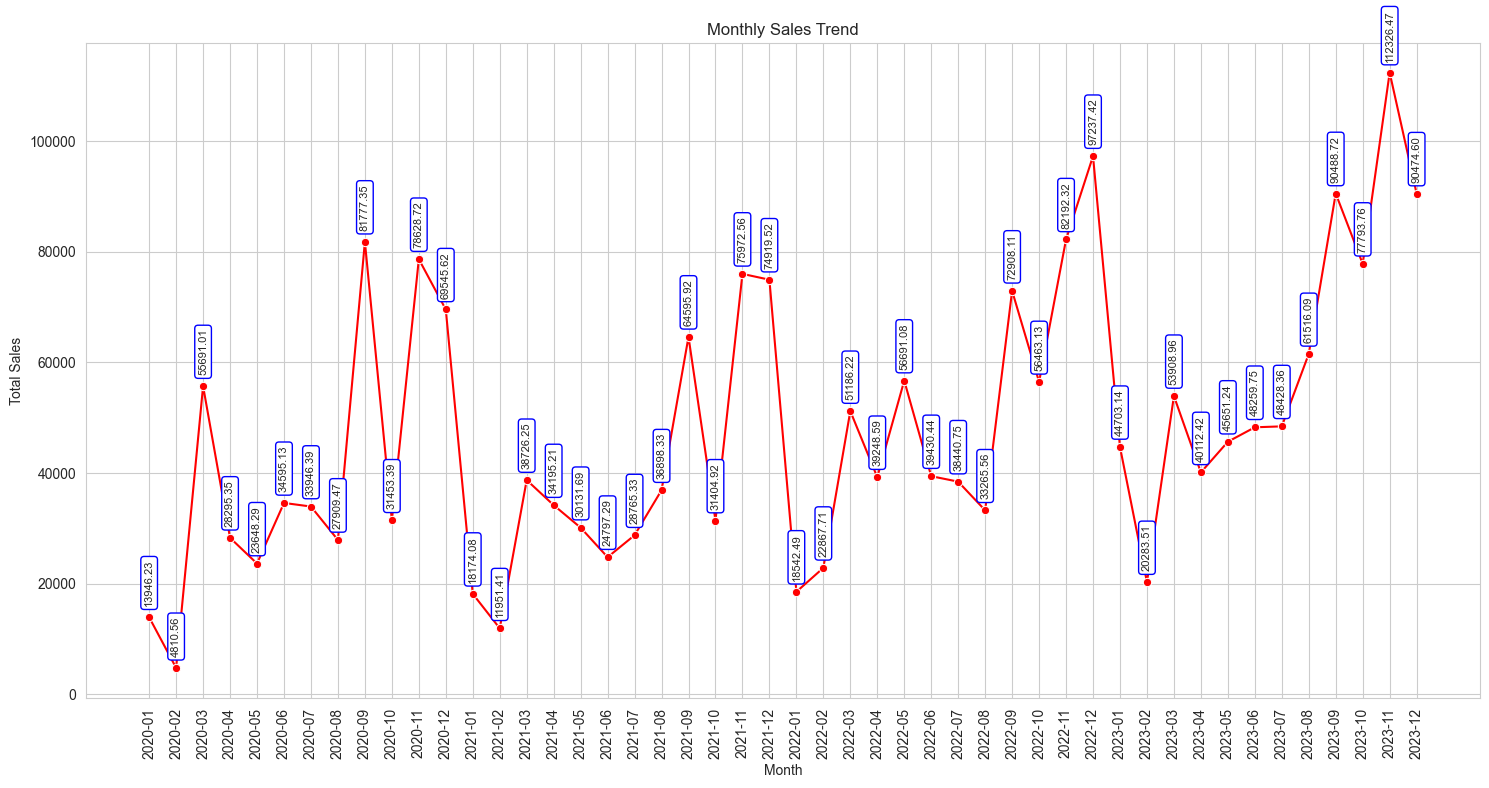

In [279]:
plt.figure(figsize= (15,8))

# Plot the line chart
sns.lineplot(data=sales_monthly, x=sales_monthly.index, y='Sales', color='red', marker='o')

# Total sales label for each month
for i, value in enumerate(sales_monthly['Sales']):
    plt.annotate(f'{value:.2f}', (sales_monthly.index[i], value), ha='center', va='bottom', 
                 xytext=(0, 8), textcoords='offset points', rotation=90, fontsize=8,
                 bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))


plt.xticks(rotation=90)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()

plt.show()

The graph illustrates monthly sales trends from 2020 to 2023, with key insights as follows:

- **Fluctuating Sales Pattern** : Sales show a recurring pattern of peaks and troughs, suggesting potential seasonality.
- **Upward Trend in Late 2023**: There is a noticeable upward trend in the latter part of 2023, with the highest sales recorded in December 2023.
- **Sharp Increases and Decreases**: Several months display sharp increases or decreases, potentially due to special events, promotions, or seasonal factors impacting sales.



In [280]:
sales_yearly = df_sales.groupby(by= 'Year')[['Sales']].sum()
sales_yearly 

,Sales
Year,
2020,484247.4981
2021,470532.5090
2022,608473.8300
2023,733947.0232


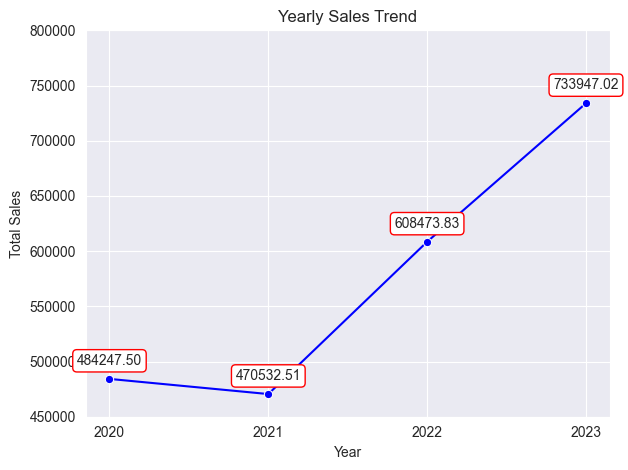

In [311]:
sns.lineplot(data=sales_yearly, x=sales_yearly.index, y='Sales', color='blue', marker='o')

# Add annotation
for i, value in enumerate(sales_yearly['Sales']):
    plt.annotate(f'{value:.2f}', (sales_yearly.index[i], value), ha='center', va='bottom', 
                 xytext=(0, 8), textcoords='offset points', fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

plt.ylim(4.5e5,8e5)
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.grid(True)  # Adding grid

plt.show()

The graph shows the yearly sales trend from 2020 to 2023, with the following key insights:

- **Overall Growth**: There is a steady increase in total sales over the years, especially between 2021 and 2023.
- **Sales Decline in 2021**: A slight decline is observed from 2020 to 2021, where sales dropped from approximately 484,000 to 470,000.
- **Significant Growth in 2022 and 2023**: Sales saw a sharp increase in 2022, reaching over 600,000, and continued to rise to approximately 734,000 in 2023, indicating strong growth momentum.


### **2. Product-wise Sales Analysis**

In [312]:
produk_sales = df_sales.groupby(by = 'Product')[['Sales']].median().sort_values(by = 'Sales', ascending= False)
produk_sales

,Sales
Product,
Alchemy,1099.98000
Big Ol Database,599.98500
Marketing Suite,306.82025
Site Analytics,209.97000
FinanceHub,180.98000
Marketing Suite - Gold,113.92800
Data Smasher,100.00000
OneView,82.69000
SaaS Connector Pack,41.96000


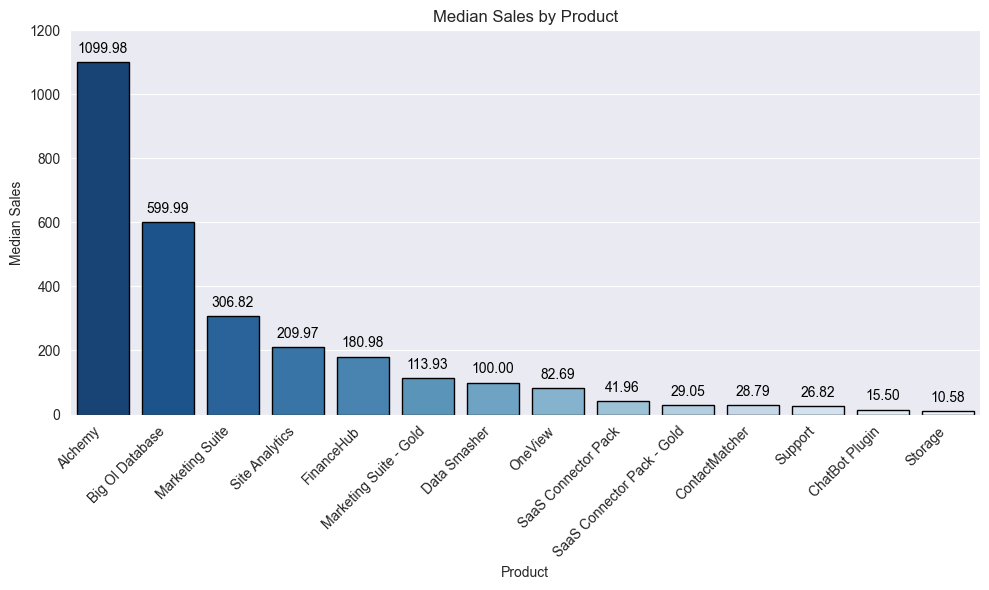

In [372]:
plt.figure(figsize=(10, 6))
sns.barplot(x=produk_sales.index, y=produk_sales['Sales'], palette='Blues_r', edgecolor='black')

# Adding annotations
for i, v in enumerate(produk_sales['Sales']):
    plt.text(i, v + 20, f"{v:.2f}", ha='center', va='bottom', fontsize=10, color='black')

plt.ylim(0,1200)
plt.title('Median Sales by Product')
plt.xlabel('Product')
plt.ylabel('Median Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**Output:**

1. High-performing products such as Alchemy, Big Ol Database, and Marketing Suite show strong sales, indicating their popularity and market success.

2. Products like Support, ChatBot Plugin, and Storage have lower average sales, suggesting possible areas for improvement or strategic changes to boost their performance.


## **Customer Analysis**

In [344]:
cust_sales = df_sales.groupby(by= ['Customer ID', 'Customer'])[['Sales']].sum().sort_values(by= 'Sales', ascending= False)
cust_sales.head()

,,Sales
Customer ID,Customer,
1029,Anthem,55719.2100
1009,Ford Motor,43893.0424
1080,Allianz,42904.1670
1011,Bank of America Corp.,41255.9471
1093,Valero Energy,41220.4188


In [345]:
# Top 3 customer profit
top3_cust = cust_sales.head(3)
top3_cust

,,Sales
Customer ID,Customer,
1029,Anthem,55719.2100
1009,Ford Motor,43893.0424
1080,Allianz,42904.1670


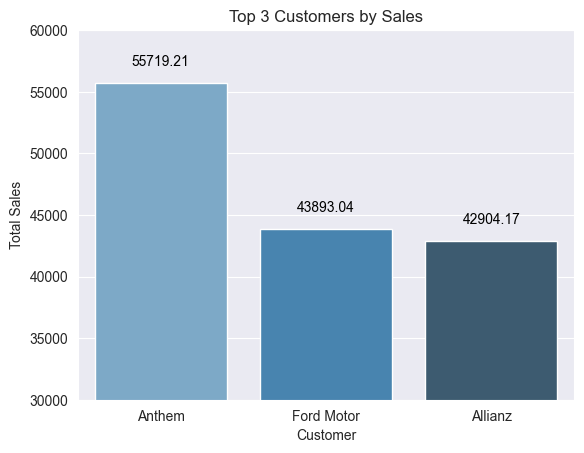

In [346]:
cust = sns.barplot(data=top3_cust, x='Customer', y='Sales', palette='Blues_d')

# Annotation 
for p in cust.patches:
    cust.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                xytext=(0, 10), textcoords='offset points', color='black')

plt.ylim(3e4,6e4)    
sns.set_style('darkgrid')
plt.title('Top 3 Customers by Sales')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.show()

In [347]:
cust_order = df_sales.groupby(by= ['Customer ID', 'Customer'])[['Order ID']].count().sort_values(by= 'Order ID', ascending= False)
cust_order.head()

,,Order ID
Customer ID,Customer,
1080,Allianz,192
1088,Tyson Foods,184
1009,Ford Motor,176
1043,Siemens,170
1022,Comcast,161


In [348]:
# Top 3 customer order
top3_order = cust_order.head(3)
top3_order

,,Order ID
Customer ID,Customer,
1080,Allianz,192
1088,Tyson Foods,184
1009,Ford Motor,176


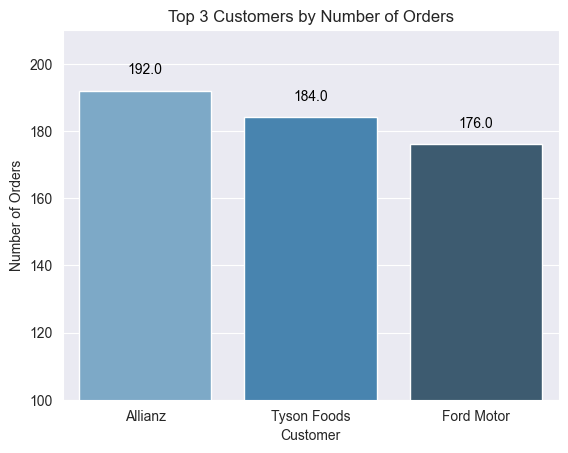

In [349]:
ax = sns.barplot(data=top3_order.reset_index(), x='Customer', y='Order ID', palette='Blues_d')

# Add annotation
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                xytext=(0, 10), textcoords='offset points', color='black')

plt.ylim(100,210)    
plt.title('Top 3 Customers by Number of Orders')
plt.xlabel('Customer')
plt.ylabel('Number of Orders')
plt.show()

Allianz and Ford Motors ranked among the top in both highest sales and most orders sold.

In [350]:
cust_allianz = df_sales[df_sales['Customer'] == 'Allianz'].groupby(by= ['Customer', 'Product'])[['Sales']].sum().reset_index().sort_values(by=['Customer', 'Sales'], ascending= False)
cust_allianz

,Customer,Product,Sales
4,Allianz,FinanceHub,9654.954
2,Allianz,ContactMatcher,7835.781
12,Allianz,Support,6378.058
10,Allianz,Site Analytics,5980.952
6,Allianz,Marketing Suite - Gold,4829.464
3,Allianz,Data Smasher,1967.558
8,Allianz,SaaS Connector Pack,1507.226
5,Allianz,Marketing Suite,1444.504
0,Allianz,Alchemy,1079.976
9,Allianz,SaaS Connector Pack - Gold,1079.452


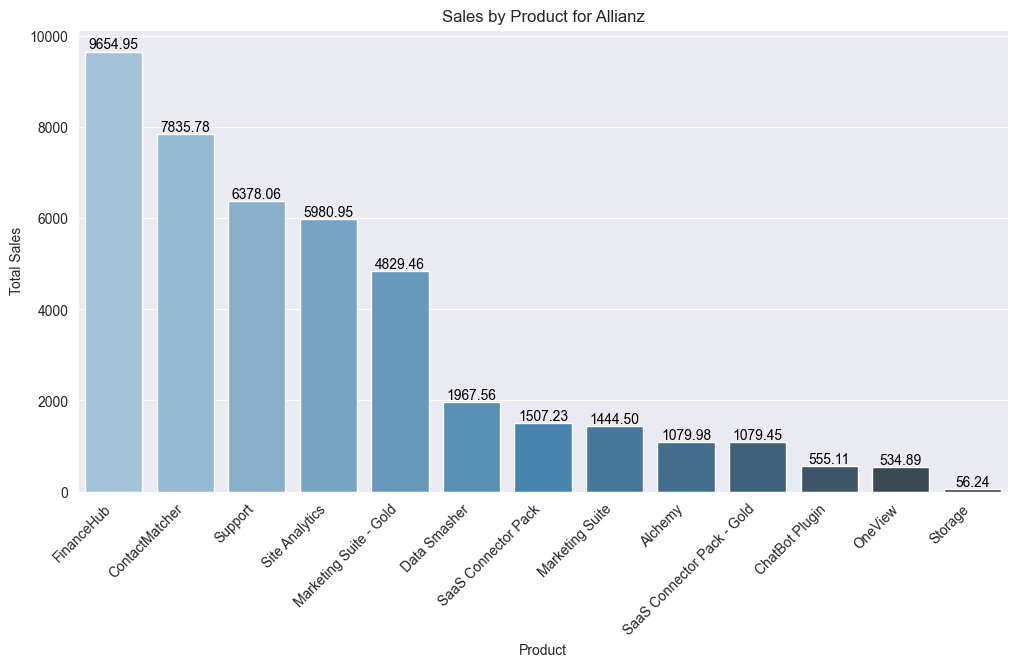

In [351]:
# Allianz Graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=cust_allianz, x='Product', y='Sales', palette='Blues_d')

# Annotation
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black')

plt.title('Sales by Product for Allianz')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [352]:
cust_ford = df_sales[df_sales['Customer'] == 'Ford Motor'].groupby(by= ['Customer', 'Product'])[['Sales']].sum().reset_index().sort_values(by=['Customer', 'Sales'], ascending= False)
cust_ford

,Customer,Product,Sales
3,Ford Motor,ContactMatcher,11335.4040
11,Ford Motor,Site Analytics,5853.3100
1,Ford Motor,Big Ol Database,5637.5840
5,Ford Motor,FinanceHub,5506.8440
7,Ford Motor,Marketing Suite - Gold,4806.6720
13,Ford Motor,Support,2841.3820
0,Ford Motor,Alchemy,2799.9500
4,Ford Motor,Data Smasher,1500.9580
8,Ford Motor,OneView,1239.3580
9,Ford Motor,SaaS Connector Pack,784.5600


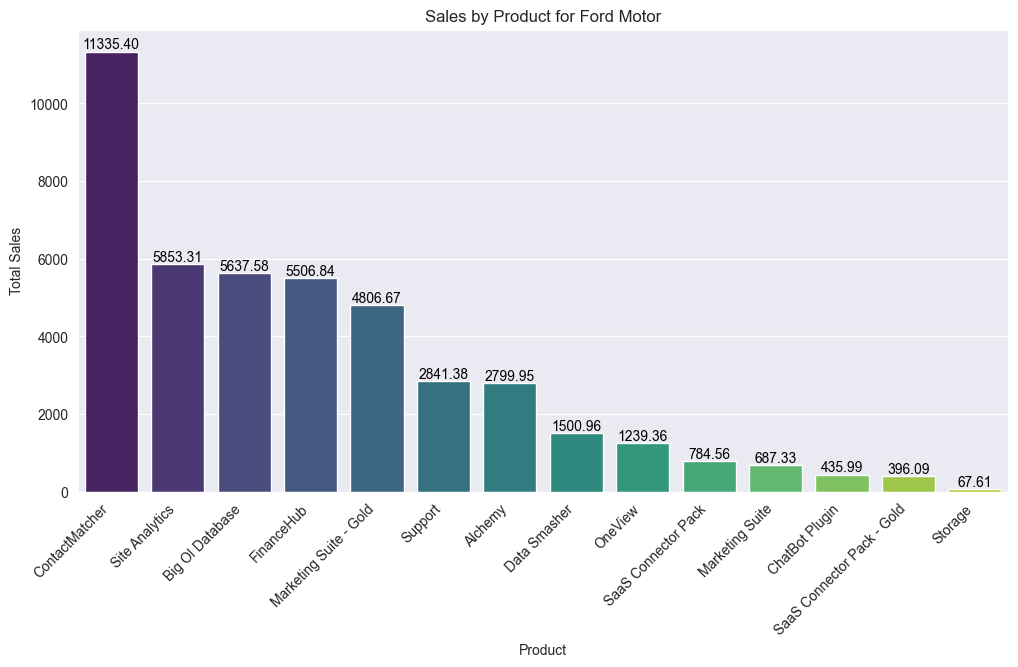

In [353]:
# Ford Graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=cust_ford, x='Product', y='Sales', palette='viridis')

# Add annotation
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black')

plt.title('Sales by Product for Ford Motor')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [354]:
# Top 3 Allianz
top3_allianz = df_sales[df_sales['Customer'] == 'Allianz'].groupby( by=['Customer', 'Product'])[['Sales']].sum().reset_index().sort_values(by='Sales', ascending=False).head(3)
top3_allianz

,Customer,Product,Sales
4,Allianz,FinanceHub,9654.954
2,Allianz,ContactMatcher,7835.781
12,Allianz,Support,6378.058


In [355]:
# Top 3 Ford Motor
top3_ford = df_sales[df_sales['Customer'] == 'Ford Motor'].groupby(by=['Customer', 'Product'])[['Sales']].sum().reset_index().sort_values(by='Sales', ascending=False).head(3)
top3_ford

,Customer,Product,Sales
3,Ford Motor,ContactMatcher,11335.404
11,Ford Motor,Site Analytics,5853.310
1,Ford Motor,Big Ol Database,5637.584


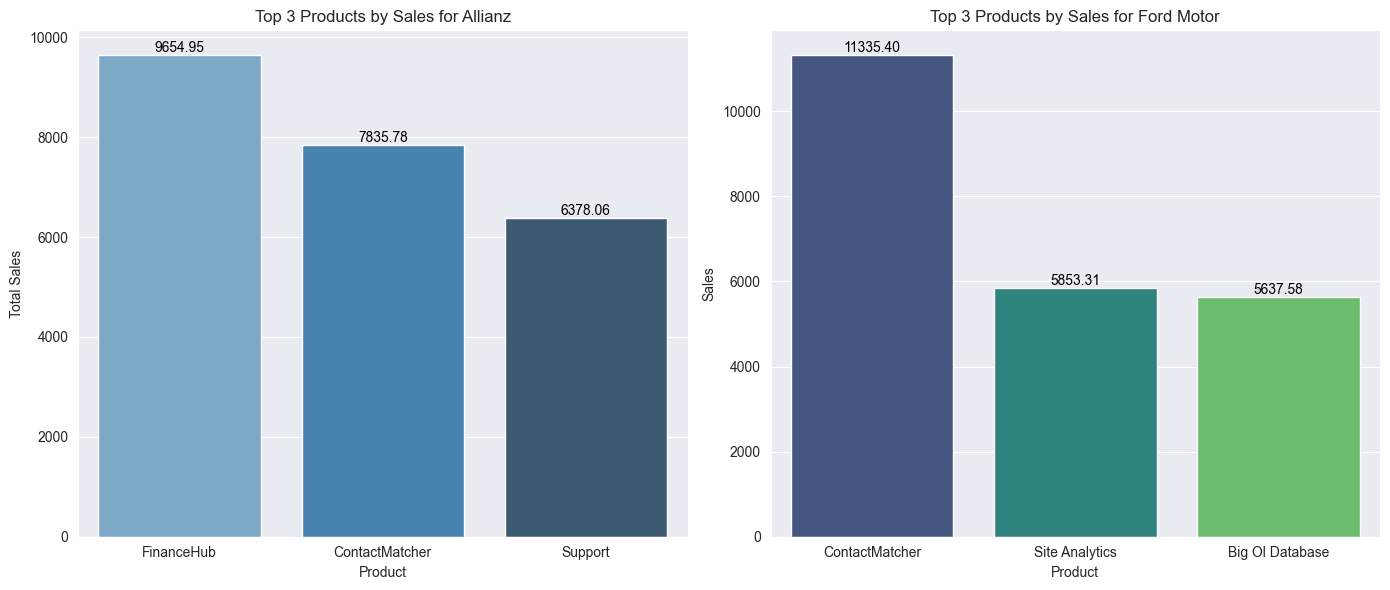

In [356]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Allianz
sns.barplot(data=top3_allianz, x='Product', y='Sales', ax=ax1, palette='Blues_d')
ax1.set_title('Top 3 Products by Sales for Allianz')
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Sales')
ax1.tick_params(axis='x')

# Annotation for Allianz
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

# Ford Motor
sns.barplot(data=top3_ford, x='Product', y='Sales', ax=ax2, palette='viridis')
ax2.set_title('Top 3 Products by Sales for Ford Motor')
ax2.set_xlabel('Product')
ax2.tick_params(axis='x')

# Annotation for Ford Motor
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

ContactMatcher is an important product for both companies, indicating high relevance across various industries.

## **Profit Analysis**

In [357]:
prod_profit = df_sales.groupby(by= 'Product')[['Profit']].sum().sort_values(by= 'Profit', ascending= False)
prod_profit

,Profit
Product,
Alchemy,55617.8249
Site Analytics,44515.7306
Data Smasher,41936.6357
Support,32864.4698
FinanceHub,32136.4203
Marketing Suite - Gold,21278.8264
OneView,18138.0054
SaaS Connector Pack,13059.1436
ContactMatcher,12496.2822


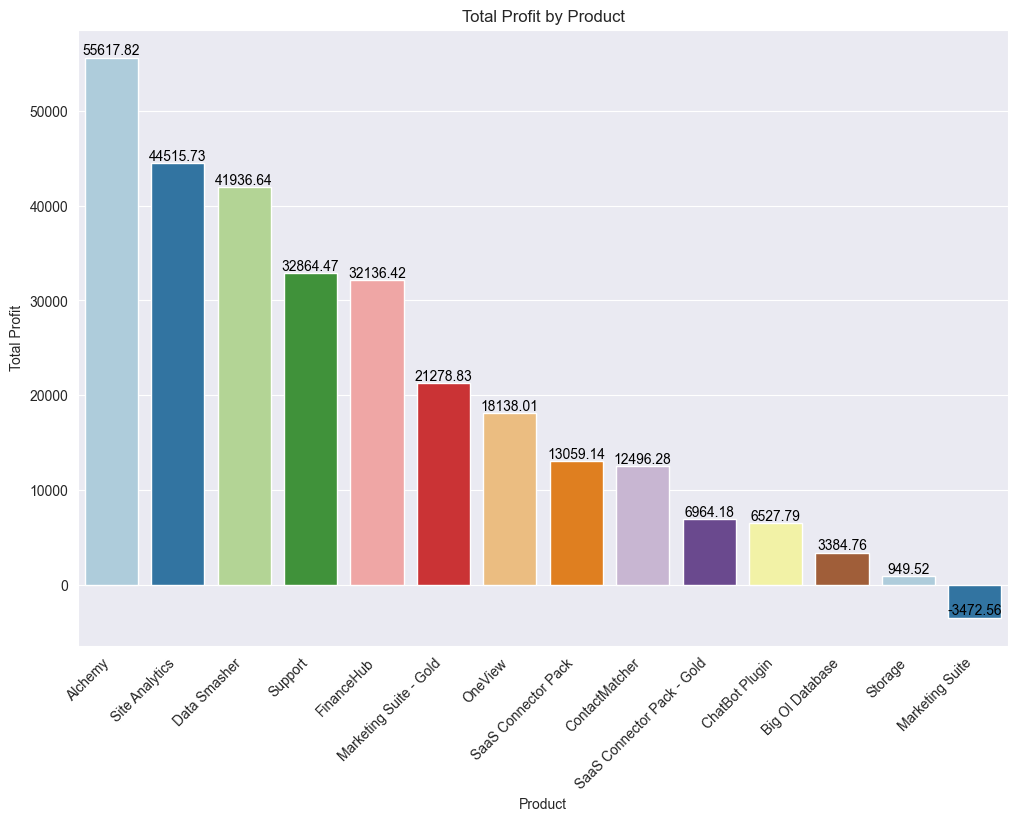

In [358]:
plt.figure(figsize=(12, 8))
profit = sns.barplot(data=prod_profit.reset_index(), x='Product', y='Profit', palette='Paired')

for p in profit.patches:
    profit.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black')

plt.title('Total Profit by Product')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [359]:
# Top 3 Profit Product

top3_product = prod_profit.head(3)
top3_product

,Profit
Product,
Alchemy,55617.8249
Site Analytics,44515.7306
Data Smasher,41936.6357


In [360]:
bottom3_product = prod_profit.tail(3)
bottom3_product

,Profit
Product,
Big Ol Database,3384.7569
Storage,949.5182
Marketing Suite,-3472.5560


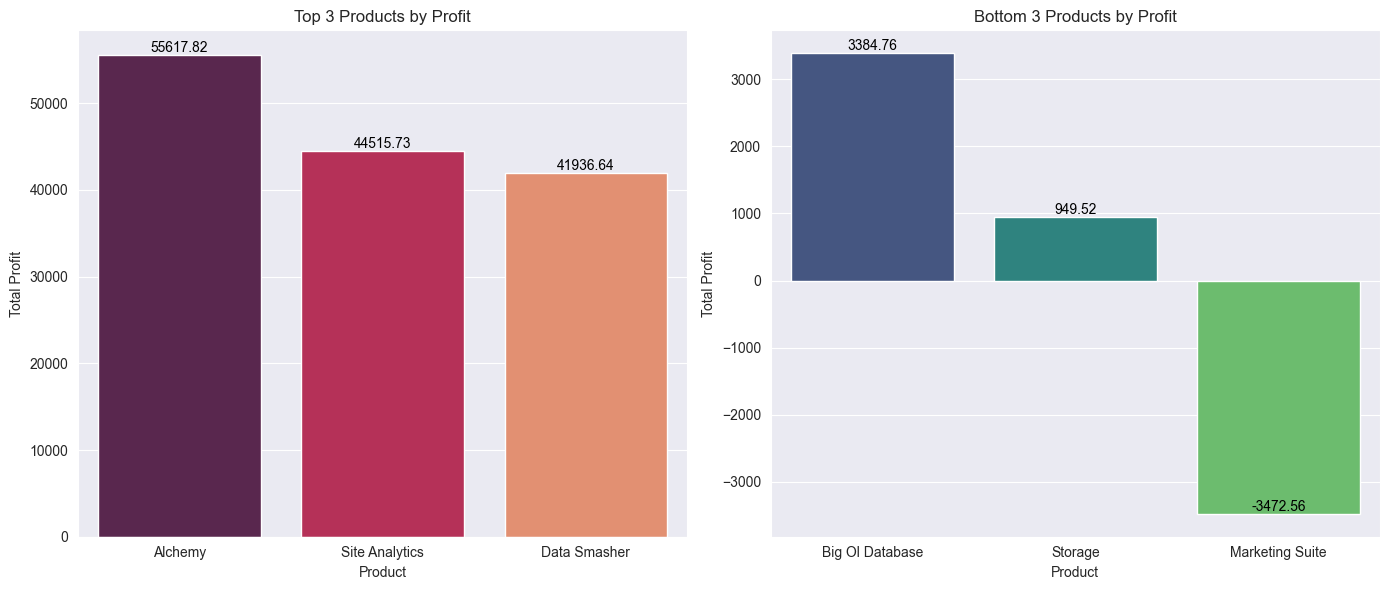

In [361]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Top 3 Products by Profit
sns.barplot(data=top3_product.reset_index(), x='Product', y='Profit', palette='rocket', ax=ax1)
ax1.set_title('Top 3 Products by Profit')
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Profit')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', 
                 fontsize=10, color='black')

# Bottom 3 Products by Profit
sns.barplot(data=bottom3_product.reset_index(), x='Product', y='Profit', palette='viridis', ax=ax2)
ax2.set_title('Bottom 3 Products by Profit')
ax2.set_xlabel('Product')
ax2.set_ylabel('Total Profit')

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', 
                 fontsize=10, color='black')

plt.tight_layout()
plt.show()

Insights from Top and Bottom 3 Products by Profit:

1. **Top 3 Profitable Products: Alchemy, Site Analytics, Data Smasher**
   - These products, including Alchemy, Site Analytics, and Data Smasher, show high profitability, indicating strong market demand and a positive response.
   - The Product Development Team should consider investing in improvements, new features, or marketing strategies to capitalize on the success of these products.

2. **Bottom 3 Profitable Products: Big OI Database, Storage, Marketing Suite**
   - Big OI Database, Storage, and Marketing Suite show lower profitability, suggesting challenges in market performance.
   - The Product Development Team should evaluate these products to identify areas for improvement, updates, or strategy adjustments to boost competitiveness and overall profitability.


## **Geographical Analysis**

In [362]:
geo_sales = df_sales.groupby('Country')['Sales'].sum().reset_index()
country = geo_sales.sort_values(by='Sales')
country.head()

,Country,Sales
33,Qatar,919.910
18,Iceland,1209.824
12,Denmark,1270.530
10,Croatia,1315.560
37,Slovenia,1603.136


In [363]:
lower_countries= geo_sales.sort_values(by='Sales').head(3)
lower_countries

,Country,Sales
33,Qatar,919.910
18,Iceland,1209.824
12,Denmark,1270.530


In [364]:
top_countries = geo_sales.sort_values(by='Sales').tail(3)
top_countries

,Country,Sales
24,Japan,170188.0458
46,United Kingdom,313169.8810
47,United States,457687.6315


In [365]:
# Sales and Product in Top Country

country_product = df_sales[df_sales['Country'].isin(['United States', 'United Kingdom', 'Japan'])].groupby(by= ['Country', 'Product'])[['Sales']].sum().reset_index().sort_values(by= ['Country', 'Sales'], ascending= [True, False])
country_product

,Country,Product,Sales
11,Japan,Site Analytics,28589.5680
5,Japan,FinanceHub,27156.0480
3,Japan,ContactMatcher,24803.3370
1,Japan,Big Ol Database,19546.2240
7,Japan,Marketing Suite - Gold,15723.5840
6,Japan,Marketing Suite,14493.4588
13,Japan,Support,11500.2160
4,Japan,Data Smasher,11328.5600
0,Japan,Alchemy,5639.8720
9,Japan,SaaS Connector Pack,3766.7240


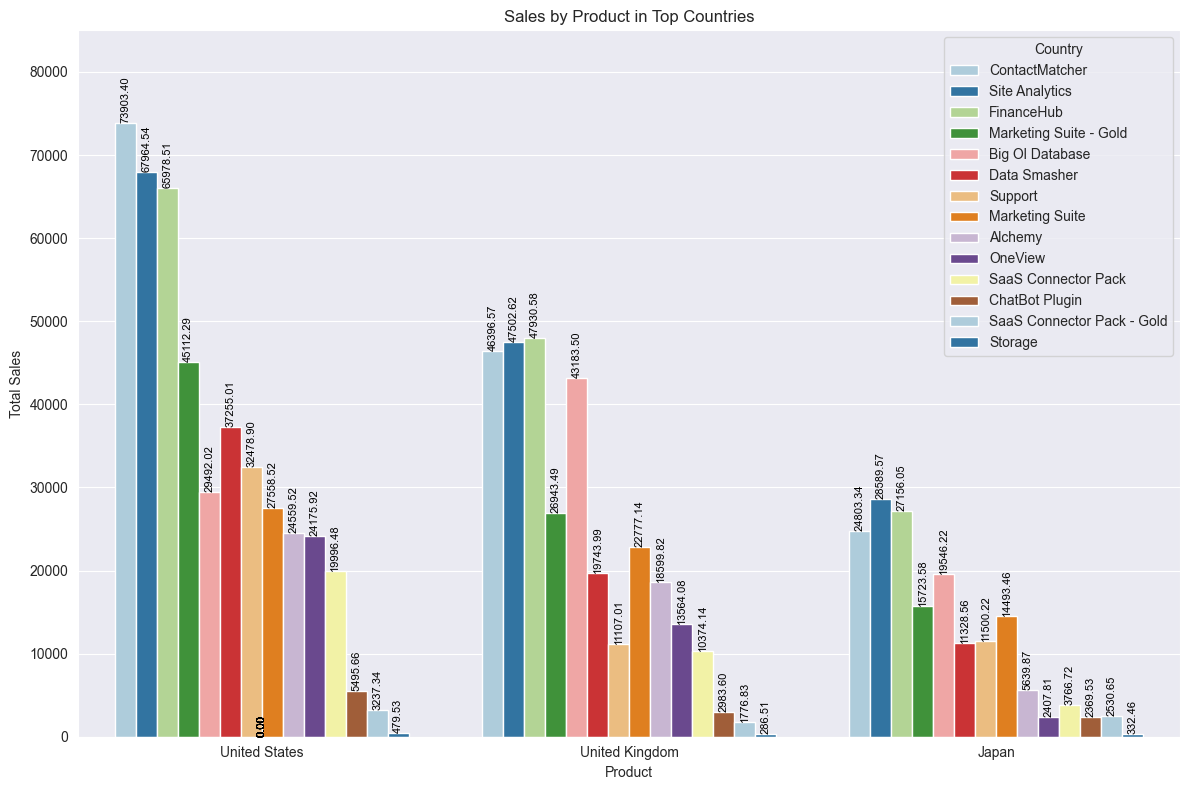

In [366]:
# Sorting
sort_prod = country_product.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=sort_prod, x='Country', y='Sales', hue='Product', palette='Paired')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', rotation = 90,
                fontsize=8, color='black')

plt.ylim(0,8.5e4)
plt.title('Sales by Product in Top Countries')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.legend(title='Country')
plt.tight_layout()

plt.show()

The U.S. is the leading market in terms of sales volume, followed by the U.K. and then Japan. The high performance of products like ContactMatcher and Site Analytics in all three countries suggests they are well-received, while products with lower sales might need additional marketing or improvements to increase their appeal.

In [367]:
# Top 3 products by sales for each country
top3_japan = country_product[country_product['Country'] == 'Japan'].nlargest(3, 'Sales')
top3_uk = country_product[country_product['Country'] == 'United Kingdom'].nlargest(3, 'Sales')
top3_us = country_product[country_product['Country'] == 'United States'].nlargest(3, 'Sales')

# Result
print("Top 3 Products in Japan:")
print(top3_japan[['Product', 'Sales']])

print("\nTop 3 Products in United Kingdom:")
print(top3_uk[['Product', 'Sales']])

print("\nTop 3 Products in United States:")
print(top3_us[['Product', 'Sales']])

Top 3 Products in Japan:
           Product      Sales
11  Site Analytics  28589.568
5       FinanceHub  27156.048
3   ContactMatcher  24803.337

Top 3 Products in United Kingdom:
           Product      Sales
19      FinanceHub  47930.577
25  Site Analytics  47502.620
17  ContactMatcher  46396.570

Top 3 Products in United States:
           Product      Sales
31  ContactMatcher  73903.400
39  Site Analytics  67964.536
33      FinanceHub  65978.508


Common Trends :
**Site Analytics**, **FinanceHub**, and **ContactMatcher** are consistently top-performing products in Japan, the UK, and the U.S. This shows a strong need for data analysis and financial solutions in these markets.

Market Focus :
The high demand for these products suggests that improving, promoting, and supporting data analytics and financial tools could help increase their success in each country.


In [368]:
# Bottom 3 products by sales for each country
bottom3_japan = country_product[country_product['Country'] == 'Japan'].nsmallest(3, 'Sales')
bottom3_uk = country_product[country_product['Country'] == 'United Kingdom'].nsmallest(3, 'Sales')
bottom3_us = country_product[country_product['Country'] == 'United States'].nsmallest(3, 'Sales')

# Result
print("Bottom 3 Products in Japan:")
print(bottom3_japan[['Product', 'Sales']])

print("\nBottom 3 Products in United Kingdom:")
print(bottom3_uk[['Product', 'Sales']])

print("\nBottom 3 Products in United States:")
print(bottom3_us[['Product', 'Sales']])


Bottom 3 Products in Japan:
           Product     Sales
12         Storage   332.464
2   ChatBot Plugin  2369.528
8          OneView  2407.814

Bottom 3 Products in United Kingdom:
                       Product    Sales
26                     Storage   286.51
24  SaaS Connector Pack - Gold  1776.83
16              ChatBot Plugin  2983.60

Bottom 3 Products in United States:
                       Product    Sales
40                     Storage   479.53
38  SaaS Connector Pack - Gold  3237.34
30              ChatBot Plugin  5495.66


Key Insights:

Improvement Opportunities :
Low-selling products can be enhanced by adjusting features or implementing targeted marketing strategies to appeal to the local market.

Strategic Focus : Understanding the reasons behind low product performance in each country can help the company improve competitiveness and boost sales for these products.


## **Correlation Analysis**

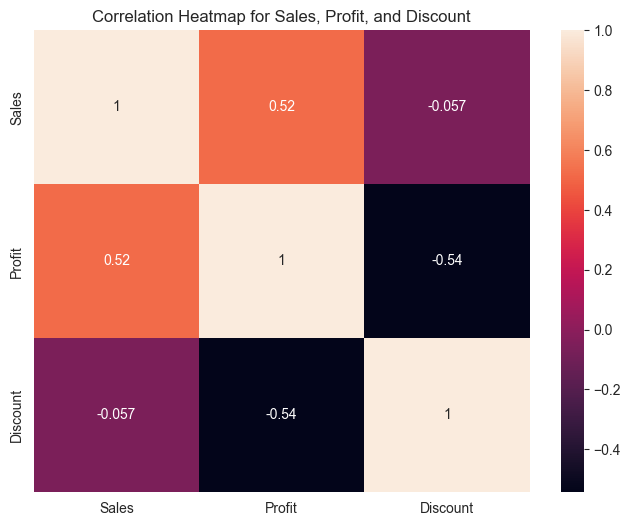

In [369]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_sales[['Sales', 'Profit', 'Discount']].corr(method='spearman'), annot=True)

plt.title('Correlation Heatmap for Sales, Profit, and Discount')
plt.show()

In [370]:
print("Correlation Analysis:")
for col1, col2 in [('Sales', 'Discount'), ('Sales', 'Profit'), ('Discount', 'Profit')]:
    corr, _ = spearmanr(df_sales[col1], df_sales[col2])
    print(f"{col1} & {col2}: {corr:.3f}")

Correlation Analysis:
Sales & Discount: -0.057
Sales & Profit: 0.518
Discount & Profit: -0.543


- Sales & Profit (0.52): Moderate positive correlation – higher sales often lead to higher profits.
- Sales & Discount (-0.057): Very weak negative correlation – discounts don’t significantly impact sales volume.
- Profit & Discount (-0.54): Moderate negative correlation – higher discounts tend to reduce profits.

Discounts may lower profit margins without boosting sales much. Adjust discount strategies to balance sales and profitability.

___
## **Conclusion**



#### **Sales Patterns and Trends**

**1. Monthly and Yearly Sales Analysis**
   - Products like **Alchemy**, **Big Ol Database**, and **Marketing Suite** have shown strong sales performance.
   - Sales tend to peak in December each year (2020, 2021, and 2022), likely due to holiday shopping, and hit their lowest point in February.
   - Overall, there is a positive sales trend with some ups and downs, showing steady growth over time.

**2. Product Sales Performance**
   - The top 3 products in terms of total sales are **ContactMatcher**, **FinanceHub**, and **Site Analytics**, leading across various customer segments and regions.
   - In terms of profit, **Alchemy**, **Site Analytics**, and **DataSmasher** contribute the most.
   - Some products, like **Support**, **ChatBot Plugin**, and **Storage**, need improvement, as they are not performing well in the market.
   - Although there is a positive overall trend, certain products like **Marketing Suite** have experienced losses, totaling $3,472.56 from 2020 to 2022. This may be due to heavy discounts offered, suggesting that a price adjustment could help increase profitability.

#### **Customer Analysis**
- **Top Customers**:  
  **Allianz** and **Ford Motors** are consistently among our biggest customers, with high sales volume and frequent orders, consistently placing them in the top 3.

- **Highest Sales Contributors**:  
  The highest sales-generating companies using our services are **Allianz**, **Ford Motors**, and **Anthem**.

- **Most Loyal Customers**:  
  **Allianz**, **Ford Motors**, and **Tyson Foods** are our most loyal customers, shown by their large number of repeat orders.

### **Industry Demand and Analysis**

- The main industries served by the company are **Energy**, **Finance**, and **Manufacturing**.
- The finance industry has high demand for products like **ContactMatcher**, **Support**, and **FinanceHub**, showing their popularity in financial services.
- **ContactMatcher**, **FinanceHub**, and **Site Analytics** are popular across top industries and regions, indicating their broad appeal.

### **Geographical Sales Analysis**

- Smaller countries like **Qatar**, **Iceland**, and **Denmark** contribute to global sales, though their impact is lower.
- The largest sales come from the **United States**, **United Kingdom**, and **Japan**.
- Top-selling products vary by region:
  - In the United States, **ContactMatcher** is the best-seller.
  - In the United Kingdom, **FinanceHub** leads in sales.
  - In Japan, **Site Analytics** is the top product.
- These differences show how customer preferences change from one region to another.

#### **Correlation Analysis**

  There is a moderately strong positive correlation between **Sales** and **Profit,** suggesting that as sales increase, profits tend to rise as well.




____
## **Recomendation**

- **Price Adjustment**:
    
    It is recommended to consider a price adjustment strategy for the `Marketing Suite` product, as it is currently experiencing `losses`. This price adjustment strategy could help turn these losses into future profits.

- **Marketing Enhancement**:
    
    To increase sales in low-performing regions and industries, we can `strengthen our marketing strategy` by `offering special discounts` for `new users` on high-profit products.

    Review the discount strategy carefully to ensure it’s actually helping with profits. Since discounts can sometimes reduce overall profit, it’s important to find the right balance that attracts customers without hurting the bottom line.

- **Financial Schedule Optimization**:
    
    Observing the seasonal trend, where sales peak at the end of the year and drop in February, we can `adjust financial policies` to `minimize losses` during low-sales months and be better prepared for high-demand periods.

- **Enhance Operational Efficiency**

    Work on reducing production costs and improving efficiency, especially for popular products like `Alchemy` and `Big Ol Database`. By making operations smoother and lowering costs, we can increase profit margins and get more value from our best-selling products.

